The S1210 airfoil was designed for high lift coefficients at low Reynolds numbers, which seems to be of interest for vertical axis wind turbine applications [1, 2]. A slotted variant for VAWTs was analyzed in a wind tunnel and using CFD [3], where the data for this notebook came from. The experimental data is not really close to the results below (which predict  higher lift and lower drag) nor is the experimental data close to the CFD results in paper. Which, interestingly, predict lower lift and higher drag. Looks like a fully turbulent simulation though.

Regardless, this is an interesting example to show what virtual displacements are good for. They are used to modify smooth geometries to model kinks or otherwise difficult geometries.

In addition, this notebook shows how to interactively plot and show the changes in the solution during the Newton iterations.

<IPython.core.display.Javascript object>


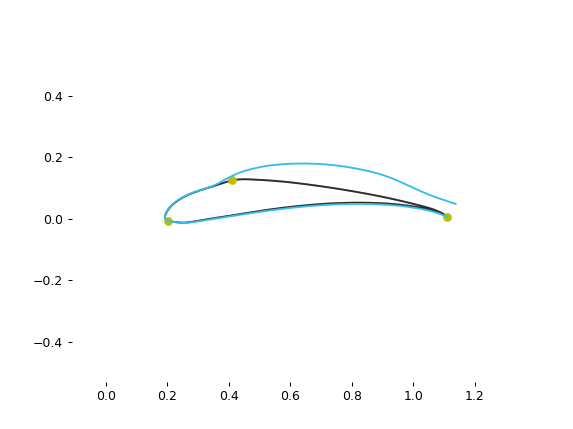

In [1]:
%matplotlib notebook
import viiflow as vf
import viiflowtools.vf_tools as vft
import viiflowtools.vf_plots as vfp
import matplotlib.pyplot as plt
import numpy as np

# Make a plot that will be updated interactively
lines = None
fig,ax = plt.subplots(1,1)

In [2]:
SCALE = 0.9 # Scale Geometry to be comparable to base airfoils
BASE = vft.repanel_spline(vft.read_selig("S1210Base.dat"),160)/SCALE
SLOT = vft.repanel_spline(vft.read_selig("S1210Slot.dat"),160)/SCALE
SLOT0 = vft.read_selig("S1210Slot0.dat")/SCALE # Actual slot shape


# Virtual displacement
[vdSlot,SLOTD] = vft.virtual_displacement_from_geometry(SLOT,SLOT0)
vdSlot[0] = 0.0
vdSlot[-1] = 0.0

AOARANGE = np.arange(0,25,0.5)
#AOARANGE = np.arange(10,-10,-0.5)

# Setup
RE = 100000
ncrit = 5
Mach = 0.0
AOA0 = AOARANGE[0]
s = vf.setup(Re=RE,Ma=Mach,ncrit=ncrit,alpha=AOA0)
s.iterate_wakes = True
s.itermax = 1
s.silent = True
s.pitch_rate = 0*90*np.pi/180*0.67/15
#s.pitch_rate = -90*np.pi/180*0.67/15

BASE[1,:]-=.5
SLOT[1,:]-=.5

# Set-up and initialize based on inviscid panel solution
(p,bl,x) = vf.init([BASE,SLOT],s)

xn = x.copy()
alv = []
clv = []
cdv = []

#vfp.plot_geometry(ax,[BASE,SLOT,p.wakes[0].X,p.wakes[1].X],lines,
#                    [bl[0].bl_fl.nodes.delta,bl[1].bl_fl.nodes.delta,-bl[0].bl_wk.nodes.delta,-bl[1].bl_wk.nodes.delta],
#                    [None,vdSlot,None,None])
#error()
for alpha in AOARANGE:
    s.alpha = alpha
    res = None
    grad = None
    for k in range(int(100/s.itermax)): # Make effectively 100 iterations, but show some in between
        [xn,flag,res,grad,_] = vf.iter(xn,bl,p,s,res,grad,[None,vdSlot])
        # Plot geometry
        lines = vfp.plot_geometry(ax,p,bl,lines)
        nres=np.sqrt(np.dot(res.T,res))
        title = "AOA %f RES %f"%(alpha,nres)
        ax.set_title(title)
        #ax.set_xlim([-.1,2.7])
        fig.canvas.draw()
        if nres<2e-3:
            alv.append(alpha)
            clv.append(p.CL)
            cdv.append(bl[0].CD+bl[1].CD)
            print('AL: %f CL: %f CD: %f' % (alpha,clv[-1],cdv[-1]) ) 
            break


AL: 0.000000 CL: 0.993580 CD: 0.038495
AL: 0.500000 CL: 1.052640 CD: 0.038579
AL: 1.000000 CL: 1.111450 CD: 0.038406
AL: 1.500000 CL: 1.170256 CD: 0.038339
AL: 2.000000 CL: 1.228520 CD: 0.038293
AL: 2.500000 CL: 1.287221 CD: 0.038262
AL: 3.000000 CL: 1.344504 CD: 0.038137
AL: 3.500000 CL: 1.402867 CD: 0.037727
AL: 4.000000 CL: 1.459983 CD: 0.036973


 xi=0.005828,delta=0.000161,theta=0.000096,ue=0.563419,typ=laminar,
 res=[0.110672,-0.236161,0]
 dx=[1.52012e-05,-0.005976,-2.14311e-05]
 x=[9.60698e-05,0.563419,4.96807e-05] 
 lam=1.000000 H=1.671597 HS=1.753738.

 xi=0.006259,delta=0.000133,theta=0.000086,ue=0.712597,typ=laminar,
 res=[0.396179,-0.760072,5.68281e-06]
 dx=[9.78254e-05,0.0283613,-6.65925e-06]
 x=[8.6065e-05,0.712597,6.75196e-05] 
 lam=0.146630 H=1.544529 HS=1.799822.

 xi=0.006483,delta=0.000127,theta=0.000078,ue=0.780569,typ=laminar,
 res=[0.579043,-0.86362,2.29009e-05]
 dx=[3.8293e-05,-0.0151013,-3.46103e-05]
 x=[7.77317e-05,0.780569,8.38736e-05] 
 lam=0.338320 H=1.636260 HS=1.765811.

 xi=0.004457,delta=0.000053,theta=0.000029,ue=1.182733,typ=laminar,
 res=[1.3099,-2.72223,2.18715e-06]
 dx=[6.5294e-06,0.0915157,-8.53019e-06]
 x=[2.91315e-05,1.18273,4.62298e-05] 
 lam=0.743599 H=1.832010 HS=1.705310.

 xi=0.004329,delta=0.000078,theta=0.000044,ue=0.682338,typ=laminar,
 res=[1.47909,-2.76556,6.56855e-06]
 dx=[1.41035e

 xi=0.006047,delta=0.000055,theta=0.000025,ue=1.859462,typ=laminar,
 res=[0.495629,-1.09363,6.34123e-06]
 dx=[-8.70934e-06,-0.107931,8.70934e-06]
 x=[2.53649e-05,1.85946,7.06118e-05] 
 lam=0.728095 H=2.152705 HS=1.634070.

 xi=0.006044,delta=0.000055,theta=0.000036,ue=1.982497,typ=laminar,
 res=[0.419408,-0.875973,0]
 dx=[2.00223e-05,0.240273,-0]
 x=[3.58163e-05,1.9825,6.4328e-05] 
 lam=0.298136 H=1.527249 HS=1.806688.

 xi=0.006040,delta=0.000055,theta=0.000029,ue=1.924473,typ=laminar,
 res=[0.377408,-0.521357,7.27843e-06]
 dx=[-8.73372e-06,-0.0677444,8.73372e-06]
 x=[2.91137e-05,1.92447,7.17144e-05] 
 lam=0.833371 H=1.883705 HS=1.691717.

 xi=0.006031,delta=0.000055,theta=0.000028,ue=1.875418,typ=laminar,
 res=[0.307999,-0.601955,6.56515e-06]
 dx=[-6.56515e-06,-0.0724262,5.92596e-06]
 x=[2.80401e-05,1.87542,7.1219e-05] 
 lam=1.000000 H=1.962684 HS=1.672632.

 xi=0.006015,delta=0.000055,theta=0.000026,ue=1.829585,typ=laminar,
 res=[0.463318,-1.02203,6.48168e-06]
 dx=[-7.83128e-06,-0.0

 xi=0.016901,delta=0.000059,theta=0.000036,ue=3.851160,typ=laminar,
 res=[0.00369208,-0.00913873,-1.01644e-20]
 dx=[1.34539e-06,-0.00755293,-1.39382e-06]
 x=[3.55347e-05,3.85116,0.000160974] 
 lam=1.000000 H=1.659248 HS=1.757895.

 xi=0.017267,delta=0.000059,theta=0.000035,ue=3.925576,typ=laminar,
 res=[4.89987e-05,-0.000123237,1.58775e-07]
 dx=[-1.58775e-07,0.000933391,3.66471e-07]
 x=[3.47169e-05,3.92558,0.000160763] 
 lam=1.000000 H=1.691764 HS=1.747088.



AL: 5.000000 CL: 1.566058 CD: 0.037002
AL: 5.500000 CL: 1.610915 CD: 0.037233
AL: 6.000000 CL: 1.664587 CD: 0.037278
AL: 6.500000 CL: 1.719448 CD: 0.037779
AL: 7.000000 CL: 1.773732 CD: 0.038294
AL: 7.500000 CL: 1.827638 CD: 0.038930
AL: 8.000000 CL: 1.879490 CD: 0.039799
AL: 8.500000 CL: 1.930515 CD: 0.040830
AL: 9.000000 CL: 1.981297 CD: 0.042040
AL: 9.500000 CL: 2.031180 CD: 0.043394
AL: 10.000000 CL: 2.080425 CD: 0.044916
AL: 10.500000 CL: 2.129808 CD: 0.046508
AL: 11.000000 CL: 2.178421 CD: 0.048273
AL: 11.500000 CL: 2.226230 CD: 0.049813
AL: 12.000000 CL: 2.272345 CD: 0.051231
AL: 12.500000 CL: 2.317275 CD: 0.052807
AL: 13.000000 CL: 2.363983 CD: 0.054571
AL: 13.500000 CL: 2.409232 CD: 0.056596
AL: 14.000000 CL: 2.453401 CD: 0.058857
AL: 14.500000 CL: 2.497127 CD: 0.061454
AL: 15.000000 CL: 2.543861 CD: 0.064666
AL: 16.000000 CL: 2.636972 CD: 0.076670
AL: 16.500000 CL: 2.690844 CD: 0.084173
AL: 17.500000 CL: 2.787363 CD: 0.103563
AL: 18.000000 CL: 2.827554 CD: 0.114388
AL: 18.500

KeyboardInterrupt: 

Exception ignored in: 'panel.panel_problem.get_velocity'
Traceback (most recent call last):
  File "c:\users\maxra\scoop\apps\python\3.7.1\lib\site-packages\numpy\matrixlib\defmatrix.py", line 194, in __getitem__
    try:
KeyboardInterrupt: 
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



<IPython.core.display.Javascript object>


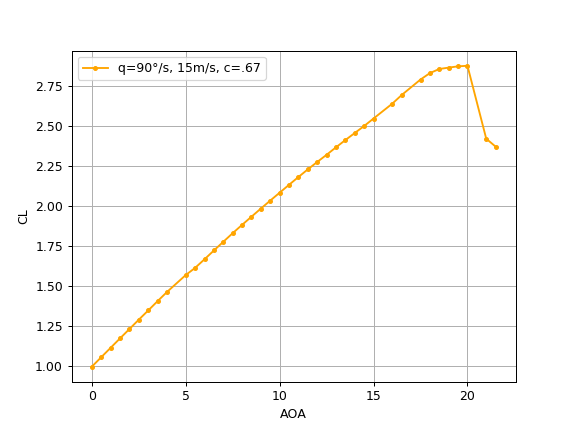

<IPython.core.display.Javascript object>


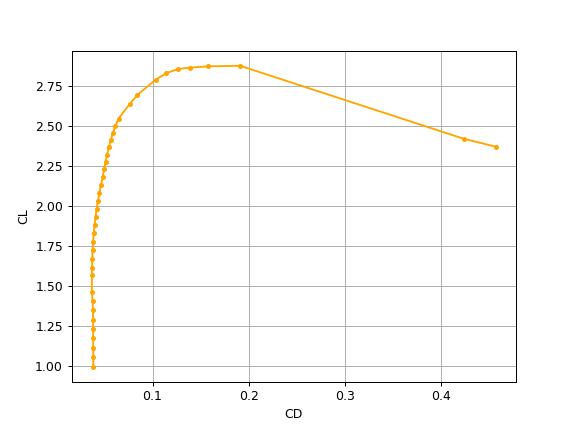

In [3]:
# Make a new plot with the results
fig,ax = plt.subplots(1,1)
ax.plot(alv,clv,marker=".",color="orange")
#ax.plot(backup[0],backup[1],marker=".")
#ax.plot(backup_pitch1[0],backup_pitch1[1],marker=".",color="orange")
ax.set_xlabel('AOA')
ax.set_ylabel('CL')
ax.legend(['q=90°/s, 15m/s, c=.67','q=0°/s'])
ax.grid(1)
fig,ax = plt.subplots(1,1)
ax.plot(cdv,clv,marker=".",color="orange")
#ax.plot(backup[2],backup[1],marker=".")
#ax.plot(backup_pitch1[2],backup_pitch1[1],marker=".",color="orange")
ax.set_xlabel('CD')
ax.set_ylabel('CL');
#ax.legend(['q=0°/s','q=90°/s, 15m/s, c=.67'])
ax.grid(1)

In [ ]:
backup=[alv.copy(),clv.copy(),cdv.copy()]

In [6]:
type(s) is type(vf.setup())

True

[1] Islam, Mazharul, et al. *Investigation of low reynolds number airfoils for fixed-pitch straight-bladed VAWT.* 47th AIAA Aerospace Sciences Meeting including The New Horizons Forum and Aerospace Exposition. 2009.

[2] Singh, M. A., A. Biswas, and R. D. Misra. *Investigation of self-starting and high rotor solidity on the performance of a three S1210 blade H-type Darrieus rotor.* Renewable energy 76 (2015): 381-387.

[3] Chougule, Prasad, and Søren RK Nielsen. *Simulation of flow over double-element airfoil and wind tunnel test for use in vertical axis wind turbine.* Journal of Physics: Conference Series. Vol. 524. No. 1. IOP Publishing, 2014.